## K Neariest Neighbors

In [27]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt", header = None)

In [62]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [30]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [31]:
df.columns = ["name", "V1","V2", "V3","V4", "V5", "V6","V7", "V8", "V9", "class"]

In [32]:
df.head()

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [33]:
df.replace("?", -9999, inplace = True)

In [34]:
df = df.drop(["name"], 1)

In [35]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [36]:
Y = df["class"]

In [37]:
Y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [38]:
X = df[["V1","V2", "V3","V4", "V5", "V6","V7", "V8", "V9"]]

In [39]:
X.head(9)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5


### Clasificador de los K vecinos

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [41]:
clf = neighbors.KNeighborsClassifier()

In [42]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
accuracy = clf.score(X_test, Y_test)

In [44]:
accuracy

0.9714285714285714

# Clasificación sin limpieza

In [60]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt", header = None)
df.replace("?", -9999, inplace = True)
df.columns = ["name", "V1","V2", "V3","V4", "V5", "V6","V7", "V8", "V9", "class"]
Y = df["class"]
X = df[["name", "V1","V2", "V3","V4", "V5", "V6","V7", "V8", "V9"]]

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2)

In [62]:
clf = neighbors.KNeighborsClassifier()

In [63]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
accuracy = clf.score(X_test, Y_test)

In [65]:
accuracy

0.6142857142857143

## Clasificar nuevos datos

In [55]:
sample_measure = np.array([4,1,3,2,1,1,2,3,4])

In [56]:
sample_measure = sample_measure.reshape(1,-1)

In [57]:
predict = clf.predict(sample_measure)

In [58]:
predict

array([2])

# Creando KNN propio

In [88]:
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [90]:
dataset = {
    'k':[[1,2],[2,3],[3,1]], # creamos datasets con puntos coordenados
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7] #nuevo punto a clasificar

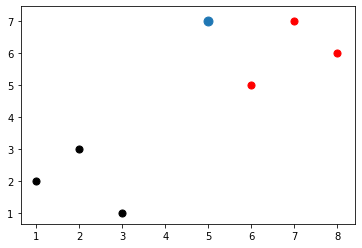

In [92]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 80)

In [96]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
            d = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([d, group])
    if verbose:
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)]
   # return vote_result[0][0]#[('r',2), ('k', 1)]

In [97]:
result = k_nearest_neighbors(dataset, new_point)

In [98]:
result

'r'

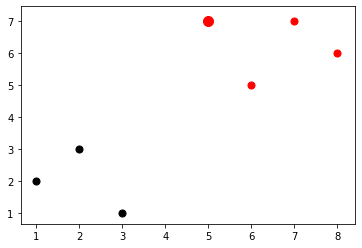

In [99]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color=result)

#### vs Data set del cancer

In [100]:
import pandas as pd

In [101]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt")

In [102]:
df.replace("?", -9999, inplace = True)

In [103]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [104]:
df.drop(["name"], 1, inplace=True)

In [59]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [106]:
full_data = df.astype(float).values.tolist()

In [107]:
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

In [108]:
import random

In [110]:
random.shuffle(full_data)

In [111]:
test_size = 0.2

In [112]:
train_set = {2:[],4:[]} #diccionario
test_set = {2:[], 4:[]}

In [113]:
train_data= full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [114]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [115]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9712230215827338
